# Classification Metrics Optimization (Video part 35)


### Goals:
- Logloss
- Accuracy
- AUC
- (Quadratic weighted) Kappa


#### Logloss
- Logloss for classifcation is like MSE for regression (it is very common so it is very easy to implement)
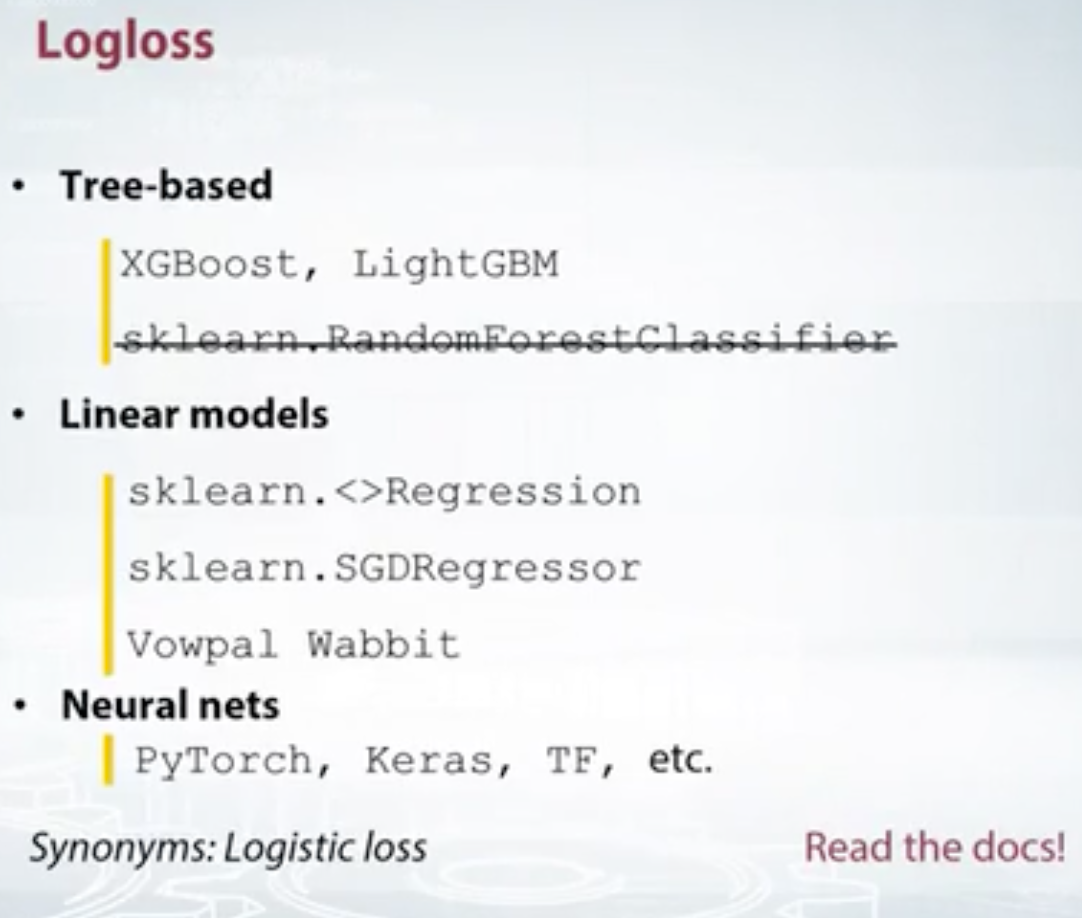
- All neural networks by default optimize logloss for classification.
- Random forest classifier predictions turn out to be quite bad in term of logloss, to make them better, we can calibrate the predictions to better fit logloss.
- Logloss requires model to output exterior probabilities. This means that if we take all the points that have a score of 0.8 for example, then there will be exactly four times more positive objects than negatives. That is 80% of the points will be from class 1 and 20% from class 0.


- The blue line in the above plot is instances sorted by value predictions for the validation set. The red line shows correspondent target value smoothed with rolling window. We can clearly see that our predictions are kind of conservative. See how the calibrated predictions is much closer to the target rolling mean.
- How to calibrate predictions:
1. Platt scaling - fit a logistic regression to our prediction (like in stacking)
2. Isotonic regression - fit Isotonic regression to our prediction (like in stacking)
3. Stacking - we first train any classifier model (doesn't even need to optimize logloss, just need to have good AUC, then we can fit another model on top that will take the prediction of our model and calculate them properly. The model on top will use logloss as its optimization loss, so it will be optimizing indirectly and its predictions will be calibrated.)
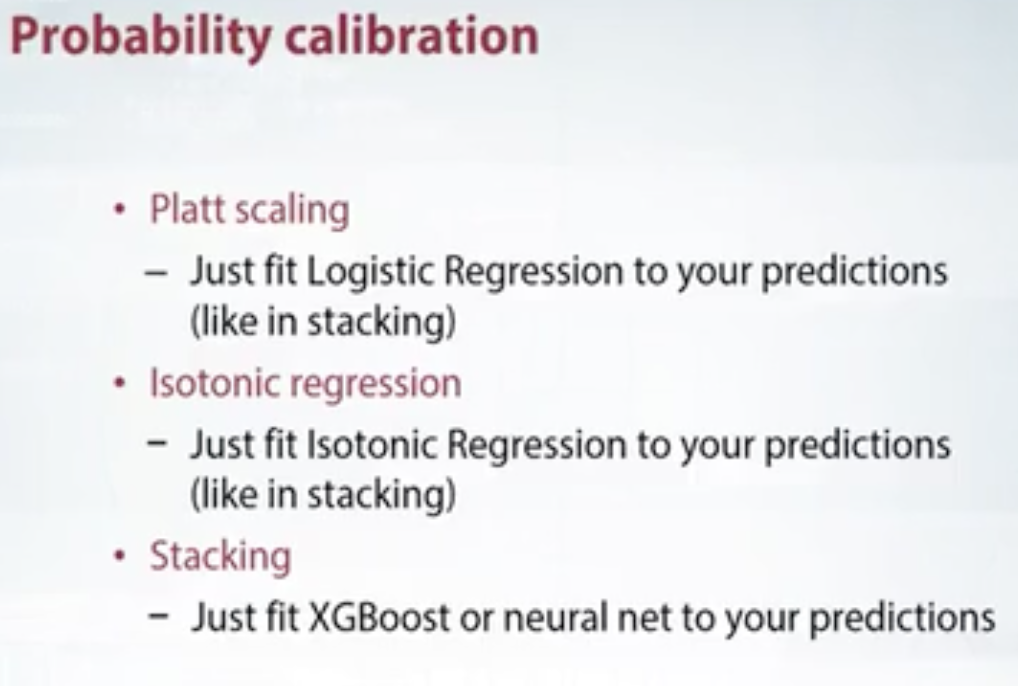

#### Accuracy
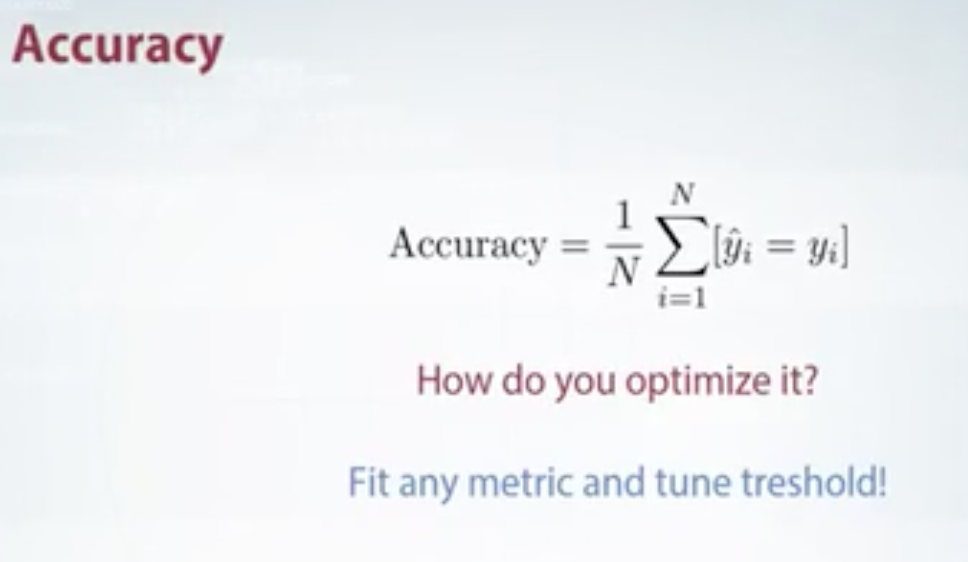
- Method to optimize for accuracy:
1. If it is binary classification task, fit any metric and tune with binarization threshold
2. For multi-class task, fit any metric and tune parameters comparing the models by their accuracy scores, not by the metric that the models were really optimizing. (so this is kind of early stopping and cross validation where you look at the accuracy score)
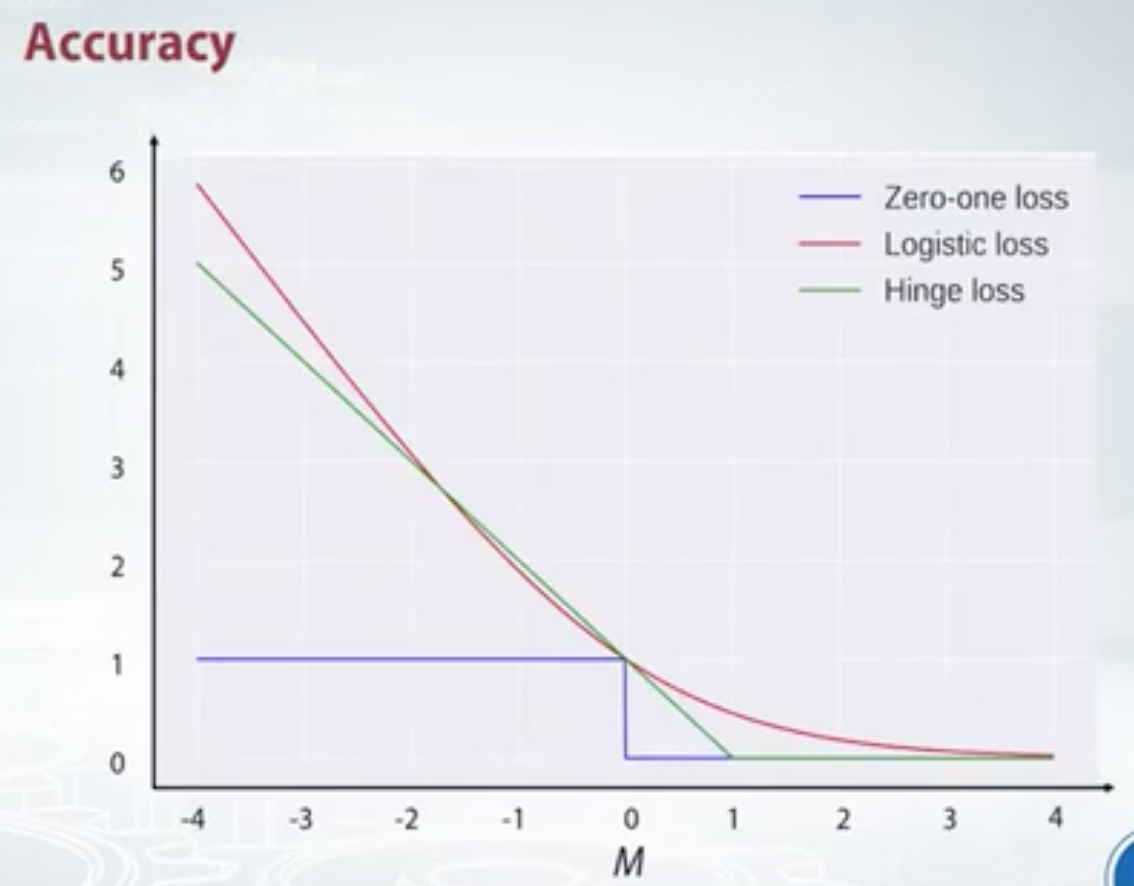
- Above plot will give intuition on why accuracy is hard to optimize. Y axis here is the loss, and the X axis here show signed distance for the decision boundary eg to a hyper plan or for a linear model. THe distance is positive if the class is predicted correctly and negative if the object is located at the wrong side of the decision boundary.
- The blue line in the above plot is the zero-one loss which is the loss corresponding to accuracy score. We pay loss=1 when the object is misclassified and 0 otherwise. The problem is that, this loss has zero gradient almost everywhere, with respect to the prediction. And most learning algorithm require a nonzero gradient to fit, otherwise it is not clear how we need to change the predictions such that the loss is decreased.
- As a workaround, people come out with proxy loss that are upper bounds for these zero-one loss - that if we fit the proxy loss, the accuracy will be perfect too. And contrary to zero-one loss, this proxy loss is differentiable.

# What I learnt:
- We can use platt scaling, isotonic regression and stacking to calibrate classification model's prediction, if the model is fitted using log loss.
- Accuracy loss is hard to optimize because it has areas of zero gradient